# Lambda-функции. Функции высшего порядка

## Передача функций в качестве аргументов
Функции в Python являются объектами, которые можно присваивать переменным, хранить в коллекциях и передавать в другие функции.  

При передаче функции в качестве аргумента передаётся ***сама ссылка на функцию, а не её результат***.  

Это означает, что функция не выполняется сразу, а только передаётся в другую функцию, где её можно вызвать.  
Как это работает?  
Когда функция передаётся в качестве аргумента:   
* Не нужно указывать () при передаче, иначе передастся результат её выполнения.  
* Функция может быть вызвана внутри другой функции по переданной ссылке с помощью ().
  
***Пример 1: Передача функции без вызова***


In [36]:
def square(x):
    return x * x

def cube(x):
    return x * x * x

def apply_function(func, value):
    return func(value)  # Вызываем переданную функцию внутри другой функции

result_square = apply_function(square, 5)  # Передаём функцию square без вызова (без скобок)
result_cube = apply_function(cube, 5)  # Передаём функцию cube без вызова (без скобок)
print(result_square)
print(result_cube)


25
125


In [37]:
a = print
a('hello')

hello


In [38]:
print('sdfbg')

sdfbg


In [39]:
a

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

***Пример 2: Передача встроенной функции***


In [40]:
# Можно передавать не только пользовательские функции, но и встроенные
result_abs = apply_function(abs, -10)
print(result_abs)
result_len = apply_function(len, "-10")
print(result_len)


10
3


***Пример 3: Ошибка при передаче вызванной функции***

In [41]:
# Передается результат вызова функции, а не ссылка на функцию
result = apply_function(square(5), 5)  # Ошибка!

TypeError: 'int' object is not callable

***Пример 4: Хранение функций в коллекциях***

In [ ]:
def add(x, y):
    return x + y

def multiply(x, y):
    return x * y

In [2]:
# Функции можно хранить в списках, словарях и передавать их динамически
operations = {
    "+": add,
    "*": multiply
}

choice = input("Выберите операцию (+, *): ")
# Из словаря получена функция и скобки с аргументами запускают её
print(operations[choice](10, 5)) #operations['+'] -> add(3,4)

Выберите операцию (+, *):  +


15


In [3]:
add(2,3)

5

## Lambda-функции  
Lambda-функция (или анонимная функция) — это небольшая, одноразовая функция, которая не требует явного объявления с def. Она используется для краткой записи простых операций и могут быть переданы как аргумент в другие функции.  

*Синтаксис:*   
`lambda arguments: expression`  

* lambda — ключевое слово для создания анонимной функции.  
* arguments — параметры, которые принимает функция.  
* expression — выражение, результат которого возвращается (без return).  

#### Примеры:
Lambda-функцию можно присвоить переменной, что на практике не используется.  

***1. Lambda с одним аргументом***


In [6]:
# Функция принимает число x и возвращает его квадрат
square1 = lambda x: x ** 2
print(square1(4))
print(square1(5))

16
25


In [7]:
# Аналог с def
def square(x):
    return x ** 2
    
print(square(4))
print(square(5))

16
25


In [8]:
square1(10)

100

In [9]:
square(20)

400

In [ ]:
#Обычная функция

In [7]:
def converter(euro):
    return f'Курс евро {euro} в долларах {0.8*euro}'

In [8]:
converter(123)

'Курс евро 123 в долларах 98.4'

In [9]:
# Лямбда фугкция
converter = lambda euro: f'Курс евро {euro} в долларах {0.8*euro}'

In [10]:
converter(123)

'Курс евро 123 в долларах 98.4'

***2. Lambda с несколькими аргументами***

In [10]:
# Функция принимает два аргумента и возвращает их сумму
add = lambda x, y: x + y
print(add(3, 5))
print(add(8, 9))

8
17


In [11]:
# Аналог с def
def add(x, y):
    return x + y
    
print(add(3, 5))
print(add(8, 9))

8
17


***3. Lambda как аргументы других функций:*** lambda-функции можно передавать как аргументы в другие функции, не создавая отдельные именованные функции.


In [12]:
def apply_func(func, numbers):
    return [func(num) for num in numbers]

result = apply_func(lambda x: x + 10, [5, 8, 3])
print(result)


[15, 18, 13]


In [14]:
def apply_func(func, numbers):
    return [func(str(num)) for num in numbers]

result = apply_func(len, [5, 8, 13])
print(result)

[1, 1, 2]


### Особенности lambda-функций
* Lambda-функция всегда возвращает результат выражения.
* Lambda может содержать только одно выражение.
* Нет многострочных блоков кода (if, for и т. д.).


### Задания для закрепления
***Исправьте ошибку в коде.***

In [15]:
operations = {
    "sum": lambda x, y: x + y,
    "mul": lambda x, y: x * y
}

print(operations("sum")(2, 3))
print(operations("mul")(2, 3))


TypeError: 'dict' object is not callable

In [16]:
operations = {
    "sum": lambda x, y: x + y,
    "mul": lambda x, y: x * y
}

print(operations["sum"](2, 3))
print(operations["mul"](2, 3))

5
6


In [18]:
operations = {
    "sum": lambda x, y, z: x + y + z,
    "mul": lambda x, y: x * y,
    'div': lambda x, y: x / y,
    'gipot': lambda x, y: (x**2 + y**2)**0.5
}

print(operations["sum"](2, 3, 4))
print(operations["mul"](2, 3))
print(operations['div'](2, 3))
print(operations['gipot'](2, 3))
      

9
6
0.6666666666666666
3.605551275463989


***Объясните что происходит при выполнении следующего кода. Произойдет ли ошибка?***


In [19]:
add(2,3)

5

In [20]:
def add(x, y):
    return x + y

print((lambda f, a, b: f(a, b))(add, 3, 4))

7


In [21]:
def add(x, y):
    return x + y

foo = lambda f, a, b: f(a, b)
print(foo(add, 3, 4))

7


In [6]:
def add(x, y):
    return x + y

def foo(f,a,b):
    return f(a, b)


print(foo(add, 3, 4))

7


In [4]:
def add(x, y):
    return x + y

In [5]:
foo = lambda f, a, b: f(a, b)

In [7]:
print(foo(add, 3, 4))

7


In [14]:
print(foo(math.pow, 3, 4))

81.0


In [11]:
sum([3,4,5])

12

In [17]:
def foo(f,a,b):
    return f(a, b)


In [18]:
foo(round, 3.2364, 2)

3.24

In [20]:
print((lambda f, a, b: f(a, b))(add, 3, 4))

7


In [12]:
import math


In [13]:
math.pow(2,3)

8.0

***Можно ли передавать встроенные функции Python в качестве аргументов другим функциям?***


# Парадигмы программирования  
***Парадигма программирования*** — это стиль написания и организации кода, который определяет способы решения задач в программировании. Различные парадигмы предлагают разные подходы к структурированию кода, обработке данных и управлению потоком выполнения программы.
### Основные парадигмы программирования  
1. Императивное программирование  
* Описывает последовательность команд, которые изменяют состояние программы.
* Код состоит из инструкций, выполняемых шаг за шагом.  
* Пример языков: Python, C, Java.  
2. Процедурное программирование (подтип императивного)  
* Код организован в функции (процедуры), каждая из которых выполняет определённую задачу.
* Используется разделение программы на логические блоки для повторного использования.
* Пример: Python, Pascal, C.  
3. Объектно-ориентированное программирование (ООП)  
* Основной концепцией является объект, который объединяет данные и методы для их обработки.
* Код организуется в классы и объекты, позволяя моделировать реальные сущности.
* Пример: Python, Java, C++.
4. Функциональное программирование
* Основано на функциях высшего порядка, чистых функциях и отсутствии изменения состояния.
* Предпочитает использование неизменяемых данных и рекурсии вместо циклов.
* Пример: Haskell, Lisp, Python.
5. Декларативное программирование
* Описывает что должно быть сделано, а не как.
* Включает функциональное программирование, а также языки разметки (SQL, HTML).
* Пример: SQL, Prolog, Haskell.  

Современные языки программирования, такие как Python, поддерживают несколько парадигм, позволяя использовать гибридные подходы. Например, в Python можно писать как в процедурном стиле, так и использовать ООП и функциональные концепции. Выбор парадигмы зависит от задачи, удобства и требований проекта.


# Функциональное программирование  
***Функциональное программирование (Functional Programming)*** — это парадигма программирования, в которой основной единицей организации кода являются функции. Программы строятся из чистых функций, которые принимают аргументы и возвращают результат, не изменяя состояние программы.
### Основные принципы функционального программирования
1. ***Чистые функции***
* Функция всегда возвращает один и тот же результат при одинаковых входных данных.
* Не изменяет внешние переменные (отсутствуют побочные эффекты).
2. ***Неизменяемость данных***
* Данные не изменяются, вместо этого создаются новые объекты.
* Изменяемость приводит к непредсказуемому поведению.
3. ***Функции как объекты***
* Функции можно передавать в другие функции, возвращать из функций, хранить в переменных.
* Это позволяет использовать функции высшего порядка.
4. ***Функции высшего порядка***
* Функции, которые принимают другие функции в качестве аргументов или возвращают их.
5. ***Рекурсия вместо циклов***
* Функциональные языки программирования часто используют рекурсию вместо циклов.


## Функции высшего порядка
***Функции высшего порядка*** — это функции, которые могут принимать другие функции в качестве аргументов и/или возвращать функции в качестве результата.
### Признаки функций высшего порядка:
1. ***Принимают функции в качестве аргументов***:
   * Функция передаётся как параметр и используется внутри.
2. ***Возвращают функции как результат***:
   * Функция создаётся и возвращается другой функцией.
### Часто используемые функции высшего порядка:  
   * Встроенные функции высшего порядка: map(), filter(), reduce().
   * Использование sorted() с ключом сортировки.


# Функции map, filter, reduce
Это функции высшего порядка, которые принимают другую функцию в качестве аргумента и применяют её к элементам переданного итерируемого объекта.
### Функция map  
`map()` — функция, которая применяет переданную функцию к каждому элементу одного или нескольких итерируемых объектов и возвращает итератор (итерируемый объект) с результатами.  
***Особенности:***  
Используется для преобразования данных.  
Результат нужно преобразовать в список или другой итерируемый объект, чтобы увидеть значения.  
***Синтаксис:***  
`map(function, iterable)`

* function — функция, применяемая к каждому элементу итерируемого объекта.
* iterable — итерируемый объект (список, кортеж, строка и т.д.).


In [23]:
num = '1 2 3 4 5'.split()
print(int(num))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [1]:
# функциональный стиль
numbers = input() #'1 2 3 4 5'
print(list(map(int,numbers.split())))

 1 2 3 4 5


[1, 2, 3, 4, 5]


In [ ]:
# императивный стиль
numbers = input() #'1 2 3 4 5'
lst_numbers = numbers.split()
result = []
for item in lst_numbers:
    result.append(int(item))
print(result)

In [2]:
#Пример с одним объектом:
numbers = [1, 2, 3, 4]
# Каждый элемент списка возводится в квадрат 
# Результат сохраняется в новой коллекции
squared = map(lambda x: x ** 2, numbers)
print(squared)
print(list(squared))
# Исходная коллекция осталась без изменений
print(numbers)


[1, 4, 9, 16]
[1, 2, 3, 4]


In [3]:
#Пример с несколькими объектами:
a = [1, 2, 3]
b = [4, 5, 6]

# Каждая пара элементов (по индексу) списков суммируется
result = map(lambda x, y: x + y, a, b)
print(result)
print(list(result))


[5, 7, 9]


In [4]:
#Пример со встроенными функциями:
group_numbers = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]

# К каждому кортежу применяется функция sum
result = map(sum, group_numbers)
print(result)
print(list(result))


[6, 15, 24]


# Функция filter
`filter()` — функция, используемая для фильтрации элементов итерируемого объекта, возвращая только те, для которых переданная функция-предикат возвращает True.   
***Особенности:***   
* Используется для отбора нужных элементов, соответствующих условию.  
* Если вместо функции передать None, будут выбраны только элементы, которые оцениваются как True.  
* Результат нужно преобразовать в список или другой итерируемый объект, чтобы увидеть значения.  
***Синтаксис:***   
`filter(function, iterable)`  

* function — функция-предикат, определяющая условие для фильтрации.
* iterable — итерируемый объект.


In [21]:
#Пример с функцией предикатом:
numbers = [1, 2, 4, 5, 7, 9, 10, 11]
# Из списка выбираются только чётные числа
even_numbers = filter(lambda x: x % 2 == 0, numbers)
print(even_numbers)
print(list(even_numbers))


[2, 4, 10]


In [ ]:
#Пример с None:
data = [0, 1, False, True, '', 'Python', [], [1, 2, 3]]
# Из списка выбираются только те элементы, которые оцениваются как True
true_list = filter(None, data)
print(true_list)
print(list(true_list))


# Функция reduce   
`reduce()` — функцию, последовательно применяющая переданную функцию к элементам итерируемого объекта с накоплением результата, сводя его к одному значению. Эта не встроенная функция Python и находится в модуле functools.   
***Особенности:***
* Используется для агрегации данных (например, суммы или произведения).
* Работает с парой элементов, начиная с первых двух, и продолжает с результатом и каждым следующим значением.
  
***Синтаксис:***  
`from functools import reduce`   
`reduce(function, iterable, initializer)`

* function — функция, принимающая два аргумента и возвращающая один результат.
* iterable — итерируемый объект.
* initializer (необязательно) — начальное значение для накопления результата.


In [22]:
from functools import reduce

numbers = [1, 2, 3, 4]
# Умножение всех элементов списка последовательно
result = reduce(lambda x, y: x * y, numbers)
print(result)


24


In [23]:
from functools import reduce

numbers = [1, 2, 3, 4]
# Умножение всех элементов списка последовательно
result = reduce(lambda x, y: x + y, numbers)
print(result)


10


In [24]:
#Пример с initializer:
from functools import reduce

numbers = [1, 2, 3, 4]
# Умножение всех элементов списка последовательно, начиная с заданного значения
result = reduce(lambda x, y: x * y, numbers, 10)
print(result)


240


### Сравнение функций

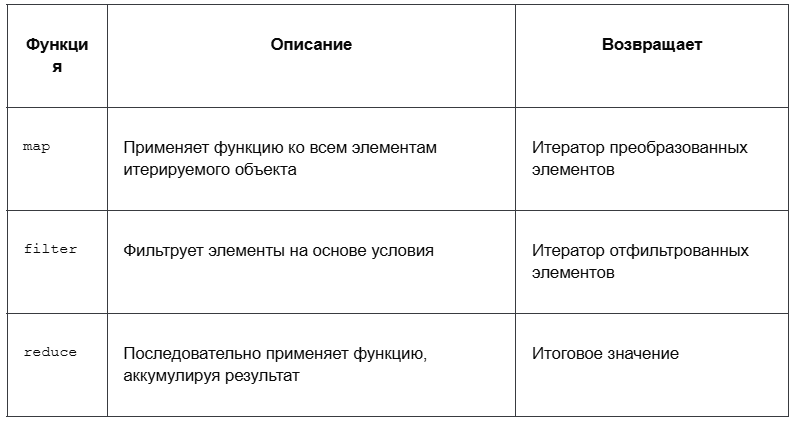

## Задания для закрепления
#### Какой результат будет выведен при выполнении следующего кода?


In [25]:
words = ["apple", "banana", "cherry"]
lengths = map(len, words)
print(list(lengths))


[5, 6, 6]


#### Какой результат будет выведен при выполнении следующего кода?


In [26]:
numbers = [5, 3, 4, 1, 5, 2]
filtered = filter(lambda x: x % 2 == 1, numbers)
print(list(filtered))


[5, 3, 1, 5]


#### Какой результат будет выведен при выполнении следующего кода?


In [28]:
from functools import reduce

numbers = [1, 2, 3, 4]
result = reduce(lambda x, y: x + y, numbers)
print(result)


10


## Функции any и all
`any` и `all` — это встроенные функции, предназначенные для работы с итерируемыми объектами. Они позволяют быстро проверить наличие истинных или ложных элементов в коллекции, не используя сложные циклы.
Ложные и истинные значения:  
* Ложные значения: 0, None, False, пустые коллекции ([], {}, (), set()).
* Истинные значения: Всё, что не считается ложным.


### Функция any
Функция any проверяет, содержит ли итерируемый объект хотя бы один истинный элемент.  
***Синтаксис:***  
`any(iterable)`

* iterable — итерируемый объект (список, кортеж, строка, множество, словарь и т.д.), элементы которого нужно проверить.  
***Особенности:***  
* Возвращает True, если хотя бы один элемент в итерируемом объекте является истинным.
* Если все элементы ложные, возвращает False.
* Если объект пустой, возвращает False.
* Выполняет проверку поэлементно и останавливается, как только находит истинное значение (ленивое вычисление).


In [31]:
data = [0, None, False, 1]
print(any(data))  # 1 — истинное значение

data = [0, None, False]
print(any(data))  # Все элементы ложные

data = []
print(any(data))  # Пустой объект


True
False
False


### Функция all
Функция all проверяет, являются ли все элементы итерируемого объекта истинными.  
***Синтаксис:***  
`all(iterable)`  

* iterable — итерируемый объект, элементы которого нужно проверить.
   
***Особенности:***   
* Возвращает True, если все элементы в итерируемом объекте истинные.
* Если хотя бы один элемент ложный, возвращается False.
* Возвращает True для пустого объекта, так как нет элементов, которые можно было бы считать ложными.
* Выполняет проверку поэлементно и останавливается, как только находит ложное значение.


In [32]:
data = [1, 2, 3]
print(all(data))  # Все элементы истинные

data = [1, 0, 3]
print(all(data))  # 0 — ложное значение

data = []
print(all(data))  # Пустой объект


True
False
True


### Сравнение any и all


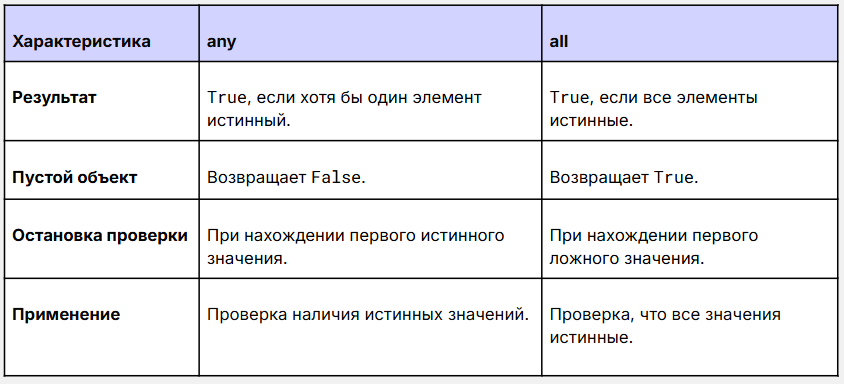ния истинные.


In [33]:
# Проверка, что хотя бы один объект соответствует условию
conditions = [x > 10 for x in [5, 20, 8]]
print(any(conditions))

# Проверка, что все объекты соответствуют условию
conditions = [x > 0 for x in [5, 20, 8]]
print(all(conditions))


True
True


In [34]:
#1. Что произойдёт, если передать в функцию any пустой список?
data = []
print(any(data))


False


In [ ]:
bool([])

In [35]:
#2. Какой результат будет выведен при выполнении следующего кода?
data = [1, 2, 3, "None"]
print(all(data))


True


## Функция как ключ в sorted, min, max
В Python функции sorted(), min() и max() принимают необязательный параметр key, который определяет, по какому критерию выполнять сортировку или поиск минимального/максимального значения.  
***В параметр key можно передавать не только встроенные функции (например, len, abs), но и пользовательские функции, созданные с помощью def или lambda.***  
### Параметр key в sorted()  
Функция `sorted(iterable, key=function)` сортирует элементы по значению, которое возвращает переданная функция.  
***Синтаксис:***  
`sorted(iterable, key=function, reverse=False)`


In [36]:
#Пример: Встроенная функция
words = ['mango', 'grape', 'apple', 'strawberry', 'banana', 'pineapple', 'kiwi', 'blueberry']
# Сортировка по длине слов
result = sorted(words, key=len)
print(result)


['kiwi', 'mango', 'grape', 'apple', 'banana', 'pineapple', 'blueberry', 'strawberry']


In [41]:
#Пример: Пользовательская функция
def last_char_len(s):
    return s[-1], len(s)

words = ['mango', 'grape', 'apple', 'strawberry', 'banana', 'pineapple', 'kiwi', 'blueberry']
# Сортировка по последнему символу и длине (последовательно)
result = sorted(words, key=last_char_len)
print(result)


['banana', 'grape', 'apple', 'pineapple', 'kiwi', 'mango', 'blueberry', 'strawberry']


In [42]:
#Пример: Анонимная функция lambda
words = ['mango', 'grape', 'apple', 'Strawberry', 'Banana', 'pineapple', 'kiwi', 'blueberry']
# Сортировка по первому символу (игнорируя регистр) и по последнему символу
result = sorted(words, key=lambda x: (x[0].lower(), x[-1]))
print(result)


['apple', 'Banana', 'blueberry', 'grape', 'kiwi', 'mango', 'pineapple', 'Strawberry']


In [46]:
#Пример: Сортировка списка кортежей
students = [("Alice", 25), ("Bob", 20), ("Charlie", 23)]
# Сортировка списка кортежей по второму элементу
sorted_students = sorted(students, key=lambda x: x[1])
print(sorted_students)


[('Bob', 20), ('Charlie', 23), ('Alice', 25)]


In [47]:
def foo(x):
    return x[1]

#Пример: Сортировка списка кортежей
students = [("Alice", 25), ("Bob", 20), ("Charlie", 23)]
# Сортировка списка кортежей по второму элементу
sorted_students = sorted(students, key=foo)
print(sorted_students)


[('Bob', 20), ('Charlie', 23), ('Alice', 25)]


## Параметр key в min max()
Функции min() и max() с параметром key позволяют находить минимальный или максимальный элемент на основе вычисленного значения.  
***Синтаксис:***  
`min(iterable, key=function)`   
`max(iterable, key=function)`


In [48]:
#Пример: Поиск самого длинного слова
words = ["apple", "banana", "kiwi", "grapefruit"]
longest_word = max(words, key=len)
print(longest_word)


grapefruit


In [49]:
#Пример: Поиск города с минимальным населением
cities = [('New York', 8419600), ('Los Angeles', 3980400), ('Chicago', 2716000)]
smallest_city = min(cities, key=lambda x: x[1])
print(smallest_city)


('Chicago', 2716000)


# Практические задания  
1. Ввод списка чисел одной строкой  
Напишите программу, которая принимает от пользователя строку целых чисел, разделенных пробелом, и суммирует эти числа.  

Пример ввода:  
Введите список целых чисел через пробел: 45 7 1 9 -4  
Пример вывода:  
Сумма чисел: 58


In [51]:
strings_list = input("Введите список целых чисел через пробел: ").split()
numbers_map = map(int, strings_list)
print(f"Сумма чисел: {sum(numbers_map)}")

Введите список целых чисел через пробел:  1 2 3


Сумма чисел: 6


In [50]:
print(f"Сумма чисел: {sum(map(int,input("Введите список целых чисел через пробел: ").split()))}")

Введите список целых чисел через пробел:  1 2 3


Сумма чисел: 6


2. Данные о сотрудниках  
У вас есть список сотрудников с их возрастами и зарплатами.  
Напишите программу, которая:  
Фильтрует сотрудников старше 30 лет.  
Увеличивает зарплату отфильтрованных сотрудников на 20%.  
Возвращает обновлённый список сотрудников.  
Данные:  
```
employees = [
    {"name": "Alice", "age": 25, "salary": 50000},
    {"name": "Bob", "age": 35, "salary": 60000},
    {"name": "Charlie", "age": 40, "salary": 70000},
    {"name": "Diana", "age": 28, "salary": 55000},
    {"name": "Eve", "age": 45, "salary": 80000}
]
```



Пример вывода:  
`[{'name': 'Bob', 'age': 35, 'salary': 72000.0}, {'name': 'Charlie', 'age': 40, 'salary': 84000.0}, {'name': 'Eve', 'age': 45, 'salary': 96000.0}]`




In [52]:
def raise_salary(emp):
    emp["salary"] = emp["salary"] * 1.2
    return emp


def process_employees(employees):
    # Шаг 1: Фильтрация сотрудников старше 30 лет
    filtered = filter(lambda emp: emp["age"] > 30, employees)
    # Шаг 2: Увеличение зарплаты на 20%
    updated = map(raise_salary, filtered)
    return list(updated)




employees = [
    {"name": "Alice", "age": 25, "salary": 50000},
    {"name": "Bob", "age": 35, "salary": 60000},
    {"name": "Charlie", "age": 40, "salary": 70000},
    {"name": "Diana", "age": 28, "salary": 55000},
    {"name": "Eve", "age": 45, "salary": 80000}
]


result = process_employees(employees)
print(result)


[{'name': 'Bob', 'age': 35, 'salary': 72000.0}, {'name': 'Charlie', 'age': 40, 'salary': 84000.0}, {'name': 'Eve', 'age': 45, 'salary': 96000.0}]
